## Parte III – Validação Holdout em Problema Não-Linearmente Separável

## Aluna: Anna Alicia Milani - 1915310030

### Neste projeto prático, a biblioteca sci-kit learn só deve ser utilizada para o cálculo de métricas de desempenho.

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from matplotlib import pyplot as plt
import import_ipynb
from Perceptron import Perceptron

### Todas as equipes devem considerar o arquivo dataHoldout.txt e apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.

In [2]:
holdout = np.fromfile('data/dataHoldout.txt').reshape(-1, 3)

In [3]:
holdout

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

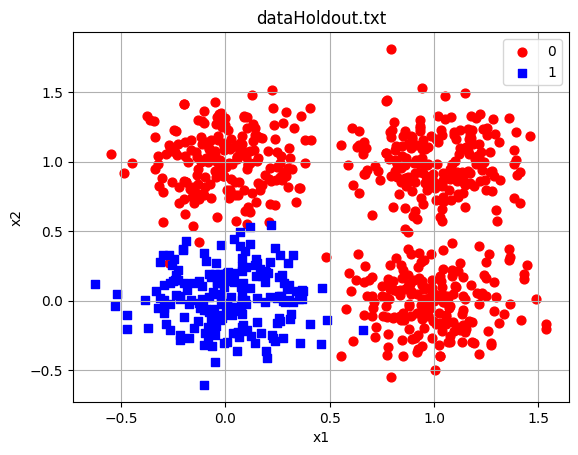

In [4]:
plt.scatter(holdout[:,0][holdout[:, 2] == 0.0], holdout[:,1][holdout[:, 2] == 0.0], c='r', s=40, marker='o', label='0')
plt.scatter(holdout[:,0][holdout[:, 2] == 1.0], holdout[:,1][holdout[:, 2] == 1.0], c='b', s=40, marker='s', label='1')
plt.title('dataHoldout.txt')
plt.legend()
plt.ylabel('x2')
plt.xlabel('x1')
plt.grid(True)
plt.show()

### Em seguida, os exemplos devem ser aleatoriamente divididos em duas partições, uma delas contendo 60% dos exemplos (treinamento) e outra contendo 40% (teste).

In [5]:
import random
random.shuffle(holdout)

holdout_size = len(holdout)

data_train = holdout[:int(holdout_size * 0.6)]
data_test = holdout[int(holdout_size * 0.6):]


In [6]:
print(f"Número de dados do arquivo: {holdout_size}")
print(f"Número de dados para treino: {len(data_train)}")
print(f"Número de dados para teste: {len(data_test)}")

Número de dados do arquivo: 800
Número de dados para treino: 480
Número de dados para teste: 320


In [7]:
data_test_X = data_test[: , :2]
data_test_y = data_test[:,2:]

In [8]:
data_train_X = data_train[: , :2]
data_train_y = data_train[:,2:]

### Execute o algoritmo por 100 épocas

In [9]:
neuron = Perceptron(data_train, len(data_train))
weightsVector = neuron.teachPerceptronByEpoch(100)

vetor de pesos:  [ 0.40782441 -0.0204899  -0.49264672]
---- Época: 1 ----
Ajuste: [ 0.40782441 -0.0204899  -0.49264672]
Ajuste: [ 0.30782441 -0.04981286 -0.50171208]
Ajuste: [ 0.20782441 -0.04182402 -0.48061078]
Ajuste: [ 0.10782441 -0.07114698 -0.48967614]
Ajuste: [ 0.00782441 -0.07897254 -0.49775965]
Ajuste: [-0.09217559 -0.05173426 -0.47940026]
Ajuste: [-0.19217559 -0.04374542 -0.45829896]
Ajuste: [-0.29217559 -0.03172504 -0.41730915]
Ajuste: [-0.19217559 -0.04268938 -0.48479144]
Ajuste: [-0.09217559 -0.13961463 -0.47401564]
Ajuste: [-0.19217559 -0.15962414 -0.43650407]
Ajuste: [-0.29217559 -0.13794899 -0.38240636]
Ajuste: [-0.19217559 -0.13377367 -0.44254389]
Ajuste: [-0.29217559 -0.11209853 -0.38844618]
Ajuste: [-0.19217559 -0.19641653 -0.37472721]
Ajuste: [-0.09217559 -0.30734998 -0.35580017]
Ajuste: [-0.19217559 -0.27472797 -0.35650723]
Ajuste: [-0.09217559 -0.24514775 -0.41277305]
Ajuste: [-0.19217559 -0.23811897 -0.37371674]
---- Fim da época: 1 com  19 ajustes ----
---- Época

### Efetue a previsão da saída deste neurônio para todos os exemplos do conjunto de teste, comparando-a com a saída desejada

In [10]:
inputVectorGroup = neuron.getInputVectorGroup(data_test, len(data_test))
y_pred = neuron.getPredictedVector(inputVectorGroup, weightsVector)

### 1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

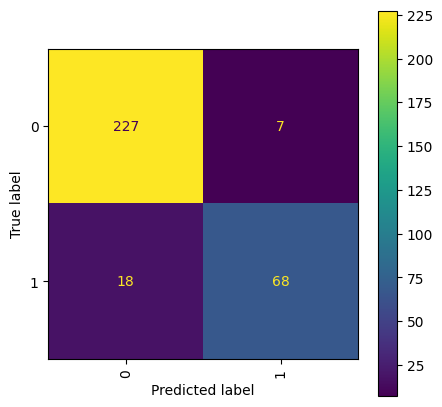

In [11]:
cm = confusion_matrix(data_test_y, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5, 5))
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

### 2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?

In [12]:
print("Acurácia: {:.2f}%".format(accuracy_score(data_test_y, y_pred) * 100))


Acurácia: 92.19%


### 3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score. Para estes cálculos, está liberada a utilização de sklearn.metrics;

In [13]:
print("Precisão: {:.2f}%".format(precision_score(data_test_y, y_pred) * 100))
print("Revocação: {:.2f}%".format(recall_score(data_test_y, y_pred) * 100))
print("F-Score: {:.2f}%".format(f1_score(data_test_y, y_pred) * 100))

Precisão: 90.67%
Revocação: 79.07%
F-Score: 84.47%


### A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

- De acordo com a matriz de confusão, pode-se notar que o neurônio acerta boa parte das previsões. Ele possui apenas 19 falsos positivos e falsos negativos dos 320 testes fornecidos;
- As métricas de acurácia e precisão foram positivas, reforçando que o neurônio possui altas taxas de acerto;
- O F1-Score mostra a efetividade do neurônio ao balancear precisão e revocação.

### Apresente dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Disponha tais gráficos lado a lado.

In [14]:
plt.figure(figsize=(20, 20))

def plot(data, outputVector, weightsVector, number_graph, title):

    data_array = neuron.getInputVectorGroup(data, len(data))
    data_array = np.delete(data_array, 0, 1)

    # Plot the vector
    plt.subplot(1, 2, number_graph)
    plt.grid(True)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(title)

    for i, point in enumerate(data_array):
      if(outputVector[i] == 1):
          plt.scatter(point[0],point[1], s=10, color="red", marker="s")
      if(outputVector[i] == 0):
          plt.scatter(point[0],point[1], s=10, color="blue", marker="o")
    
    x = np.arange(min(data_array[:,:1]),max(data_array[:,:1]), 0.1)
    y = weightsVector[0]/weightsVector[2] - (weightsVector[1]/weightsVector[2] * x)
    
    plt.axline((x[0],y[0]), 
              (x[1],y[1]), 
              color="black", 
              linewidth=1)

<Figure size 2000x2000 with 0 Axes>

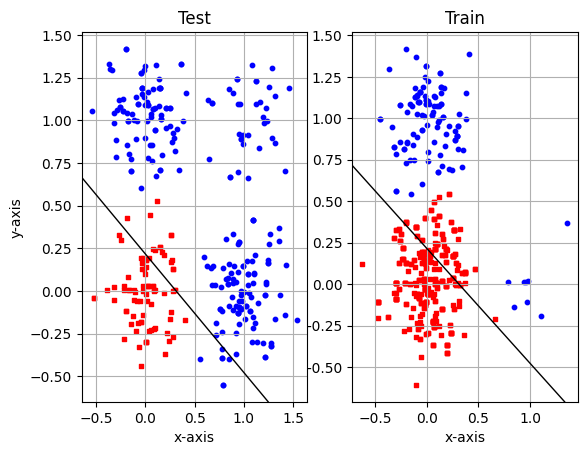

In [15]:
plot(data_train, neuron.getOutputVector(data_train), weightsVector, 2, "Train")
plot(data_test, neuron.getOutputVector(data_test), weightsVector, 1, "Test")